<a href="https://colab.research.google.com/github/eShanSE/Project_Showcase/blob/main/Project_Classification_Submission_inuse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Set-up**

## **Mount Drive**

In [ ]:
#Mount Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

## **Install TA-Lib**

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

## **Install yfinance**

In [ ]:
!pip install yfinance

## **Set Directory**

In [ ]:
%cd /content/drive/

In [ ]:
!pwd

## **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib as ta
import yfinance as yf
import datetime as dt
from pandas_datareader import data as pdr
import csv
from IPython.display import clear_output
import seaborn as sns
import requests
from scipy.stats import mstats
import pickle
import bs4 as bs
import os
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

plt.style.use('seaborn-darkgrid')

# **Data**

## **Collect Data**

In [ ]:
#Read tickers and store as numpy array
tickers_open = open("/content/drive/MyDrive/Python/Colab_Notebooks/Project_Files/Tickers/FTSE_100_TKRS_v3.txt", "r")
tickers_read = tickers_open.read()

tickers = tickers_read.split("\n")
tickers_open.close()

print(tickers)

['AAL.L', 'ABF.L', 'ADM.L', 'AHT.L', 'ANTO.L', 'AUTO.L', 'AV.L', 'AVST.L', 'AVV.L', 'AZN.L', 'BA.L', 'BARC.L', 'BATS.L', 'BDEV.L', 'BHP.L', 'BKG.L', 'BLND.L', 'BME.L', 'BNZL.L', 'BP.L', 'BRBY.L', 'BT-A.L', 'CCH.L', 'CPG.L', 'CRDA.L', 'CRH.L', 'DCC.L', 'DGE.L', 'ENT.L', 'EVR.L', 'EXPN.L', 'FERG.L', 'FLTR.L', 'FRES.L', 'GLEN.L', 'GSK.L', 'HIK.L', 'HL.L', 'HLMA.L', 'HSBA.L', 'IAG.L', 'ICP.L', 'IHG.L', 'III.L', 'IMB.L', 'INF.L', 'ITRK.L', 'JD.L', 'JET.L', 'JMAT.L', 'KGF.L', 'LAND.L', 'LGEN.L', 'LLOY.L', 'LSEG.L', 'MNDI.L', 'MRO.L', 'MRW.L', 'NG.L', 'NWG.L', 'NXT.L', 'OCDO.L', 'PHNX.L', 'PNN.L', 'POLY.L', 'PRU.L', 'PSH.L', 'PSON.L', 'PSN.L', 'RB.L', 'RDSA.L', 'REL.L', 'RIO.L', 'RMV.L', 'RR.L', 'RSA.L', 'RTO.L', 'SBRY.L', 'SDR.L', 'SGE.L', 'SGRO.L', 'SKG.L', 'SLA.L', 'SMDS.L', 'SMIN.L', 'SMT.L', 'SN.L', 'SPX.L', 'SSE.L', 'STAN.L', 'STJ.L', 'SVT.L', 'TSCO.L', 'TW.L', 'ULVR.L', 'UU.L', 'VOD.L', 'WPP.L', 'WTB.L']


In [ ]:
#Initialise empty variables
FTSE = pd.DataFrame()
get_Data = pd.DataFrame()
no_data_retrived = []

In [ ]:
#Set Date
start = dt.date(2010, 1, 1)
end = dt.date(2020, 1, 1)

In [ ]:
#Extract data from Yahoo Finance
for i in tickers:
    try:
        print(i)
        get_data = yf.download(i, start, end)
        get_data['Ticker'] = i
        FTSE = FTSE.append(get_data)
        clear_output(True)
    except:
        no_data_retrived.append(i)

    clear_output(True)

WTB.L
[*********************100%***********************]  1 of 1 completed


In [ ]:
no_data_retrived = []

In [ ]:
FTSE = FTSE.dropna().copy()
FTSE

,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,,,,,,,
2010-01-04,2695.500000,2780.000000,2695.500000,2769.500000,1924.237305,4144889.0,AAL.L
2010-01-05,2791.000000,2845.000000,2771.500000,2815.000000,1955.849609,3295842.0,AAL.L
2010-01-06,2830.000000,2874.000000,2817.000000,2863.500000,1989.547119,4857196.0,AAL.L
2010-01-07,2863.000000,2870.500000,2815.500000,2844.000000,1975.998779,4282331.0,AAL.L
2010-01-08,2849.000000,2897.000000,2815.500000,2897.000000,2012.822998,3409633.0,AAL.L
...,...,...,...,...,...,...,...
2019-12-23,4154.717773,4207.124023,4142.775879,4175.336426,4175.336426,653372.0,WTB.L
2019-12-24,4175.336426,4207.983398,4155.576660,4207.983398,4207.983398,60867.0,WTB.L
2019-12-27,4225.165527,4259.530762,4185.645996,4203.687500,4203.687500,215956.0,WTB.L


## **Technical Indicators**

### **SMA**

In [ ]:
#Calculate SMA
FTSE['SMA'] = ta.SMA(FTSE['Close'],14)

### **EMA**

In [ ]:
#Calculate EMA
FTSE['EMA'] = ta.EMA(FTSE['Close'], timeperiod = 14)

### **MACD**

In [ ]:
#Calculate MACD
FTSE['MACD'], macdsig, macdhist = ta.MACD(FTSE['Close'], 12, 26, 9)

### **Bollinger Bands**

In [ ]:
FTSE['Upper Band'], FTSE['Middle Band'], FTSE['Lower Band'] = ta.BBANDS(FTSE['Close'], timeperiod =20)

### **RSI**

In [ ]:
FTSE['RSI'] = ta.RSI(FTSE['Close'],14)

### **ADX**

In [ ]:
FTSE['ADX'] = ta.ADX(FTSE['High'], FTSE['Low'], FTSE['Close'], timeperiod=14)

### **Williams %R**

In [ ]:
FTSE['Williams %R'] = ta.WILLR(FTSE['High'], FTSE['Low'], FTSE['Close'], timeperiod=14)

### **ROC**

In [ ]:
FTSE['ROC'] = ta.ROC(FTSE['Close'], timeperiod=10)

### **Stochastic**

In [ ]:
FTSE['FASTK'], FTSE['FASTD'] = ta.STOCHF(FTSE['High'], FTSE['Low'], FTSE['Close'], fastk_period=5, fastd_period=3, fastd_matype=0)

##**Target and Winsorization**

In [ ]:
FTSE['Close_Shifted'] = FTSE.groupby('Ticker')['Close'].shift(-6)
FTSE['Target'] = ((FTSE['Close_Shifted'] - FTSE['Open'])/(FTSE['Open']) * 100).shift(-1)
FTSE['Target_Direction'] = np.where(FTSE['Target']>0,1,0)
FTSE = FTSE.dropna().copy()

In [ ]:
Indicators = ['SMA','EMA','MACD','Upper Band','Middle Band','Lower Band','RSI', 'ADX', 'Williams %R','ROC','FASTK','FASTD']

for feature in Indicators:
    FTSE.loc[:,feature] = mstats.winsorize(FTSE.loc[:,feature], limits = [0.1,0.1])

In [ ]:
FTSE.head()

,Open,High,Low,Close,Adj Close,Volume,Ticker,SMA,EMA,MACD,Upper Band,Middle Band,Lower Band,RSI,ADX,Williams %R,ROC,FASTK,FASTD,Close_Shifted,Target,Target_Direction
Date,,,,,,,,,,,,,,,,,,,,,,
2010-02-18,2425.0,2502.0,2409.0,2502.0,1738.378662,6008943.0,AAL.L,2370.964286,2411.256774,-24.208067,2522.417584,2380.80,2239.182416,52.535776,20.797026,-6.918239,6.546081,92.537224,86.220152,2390.0,-0.345739,0
2010-02-19,2458.5,2469.0,2406.5,2457.5,1707.460571,8670530.0,AAL.L,2376.571429,2417.422537,-24.208067,2512.932747,2378.40,2243.867253,49.076262,19.712213,-15.529010,6.546081,74.571429,83.962081,2450.0,1.124047,1
2010-02-22,2491.0,2500.0,2435.5,2447.0,1700.165039,4467404.0,AAL.L,2375.928571,2421.366199,-24.208067,2510.989864,2377.80,2244.610136,48.268583,18.333482,-19.112628,5.224683,55.465587,76.679005,2519.0,6.028727,1
2010-02-23,2471.5,2500.5,2369.5,2380.0,1653.613647,5965059.0,AAL.L,2374.607143,2415.850706,-24.208067,2502.116649,2373.95,2245.783351,43.364361,17.823634,-41.780822,0.804744,9.164741,45.987181,2620.5,9.004839,1
2010-02-24,2376.5,2399.0,2346.5,2385.0,1657.087769,4536376.0,AAL.L,2382.071429,2411.737278,-24.208067,2502.490594,2374.25,2246.009406,43.823077,17.613913,-40.068493,2.448454,24.758842,29.382986,2590.5,12.950403,1


# **Clustering**

##**Annual Returns and Volatility**

In [ ]:
close = FTSE[['Ticker', 'Close']]
close['Date'] = FTSE.index.astype(dtype='datetime64[ns]',copy=True).dropna()
close.sort_index()

#Pivot 
close_pivot = close.pivot('Date','Ticker','Close')
close_pivot.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Ticker,AAL.L,ABF.L,ADM.L,AHT.L,ANTO.L,AUTO.L,AV.L,AVST.L,AVV.L,AZN.L,BA.L,BARC.L,BATS.L,BDEV.L,BHP.L,BKG.L,BLND.L,BME.L,BNZL.L,BP.L,BRBY.L,BT-A.L,CCH.L,CPG.L,CRDA.L,CRH.L,DCC.L,DGE.L,ENT.L,EVR.L,EXPN.L,FERG.L,FLTR.L,FRES.L,GLEN.L,GSK.L,HIK.L,HL.L,HLMA.L,HSBA.L,...,NWG.L,NXT.L,OCDO.L,PHNX.L,PNN.L,POLY.L,PRU.L,PSH.L,PSN.L,PSON.L,RB.L,RDSA.L,REL.L,RIO.L,RMV.L,RR.L,RSA.L,RTO.L,SBRY.L,SDR.L,SGE.L,SGRO.L,SKG.L,SLA.L,SMDS.L,SMIN.L,SMT.L,SN.L,SPX.L,SSE.L,STAN.L,STJ.L,SVT.L,TSCO.L,TW.L,ULVR.L,UU.L,VOD.L,WPP.L,WTB.L
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-12-12,2158.0,2433.0,2142.0,2338.0,927.799988,537.000000,406.100006,422.000000,3547.282715,7275.0,570.000000,171.860001,3000.0,671.000000,1743.599976,4511.0,598.200012,391.399994,2070.0,469.350006,2060.0,189.279999,2467.0,1826.5,4876.0,2990.0,6298.0,3060.0,835.000000,369.500000,2458.0,6650.0,8723.832031,590.400024,226.350006,1744.199951,1928.0,1908.0,2079.0,576.500000,...,232.300003,6836.0,1210.0,727.400024,901.000000,1204.0,1369.0,1388.0,2514.0,646.400024,6029.0,2185.0,1814.0,4349.0,614.799988,241.727600,544.200012,434.899994,217.500000,3266.0,725.000000,841.599976,2738.0,310.100006,382.500000,1610.0,527.0,1697.0,8690.0,1309.5,718.000000,1119.5,2221.0,306.279785,174.100006,4529.5,848.400024,144.339996,985.200012,3969.147217
2019-12-13,2134.0,2599.0,2202.0,2313.0,929.000000,573.799988,415.799988,433.200012,3643.545410,7217.0,574.599976,182.479996,3039.0,765.000000,1738.199951,5142.0,622.200012,409.700012,2061.0,462.450012,2120.0,201.649994,2478.0,1838.5,4876.0,2985.0,6470.0,3051.0,869.200012,376.299988,2447.0,6652.0,8735.634766,572.400024,225.800003,1725.000000,1890.5,1953.0,2074.0,574.599976,...,251.800003,7190.0,1239.5,729.200012,984.400024,1165.0,1388.0,1392.0,2816.0,660.000000,6037.0,2152.5,1804.5,4320.5,641.000000,235.550598,570.200012,426.500000,223.199997,3360.0,732.400024,868.000000,2760.0,315.000000,386.500000,1619.5,523.0,1734.5,8600.0,1415.5,704.799988,1148.5,2420.0,318.313202,199.649994,4545.0,905.799988,146.240005,1023.000000,4262.107910
2019-12-16,2182.5,2631.0,2275.0,2385.0,933.799988,596.799988,428.000000,448.399994,3701.302979,7394.0,581.400024,192.460007,3172.0,774.200012,1778.400024,5214.0,631.000000,420.899994,2100.0,468.000000,2169.0,207.000000,2498.0,1861.0,4910.0,3015.0,6576.0,3114.5,894.599976,390.500000,2507.0,6690.0,8778.909180,589.400024,233.350006,1764.199951,1917.5,2073.0,2146.0,585.500000,...,261.000000,7340.0,1259.5,752.000000,1031.500000,1178.0,1442.5,1414.0,2826.0,653.799988,6178.0,2175.5,1870.5,4410.0,649.000000,241.933502,575.599976,442.299988,229.500000,3419.0,742.200012,880.799988,2844.0,325.799988,394.799988,1678.5,532.0,1771.0,8935.0,1459.5,721.200012,1199.5,2497.0,327.939789,201.199997,4630.5,945.599976,148.320007,1031.500000,4426.200195
2019-12-17,2187.5,2567.0,2277.0,2368.0,947.400024,595.599976,425.899994,452.000000,3675.633057,7450.0,567.599976,187.360001,3199.5,759.799988,1795.800049,5082.0,603.799988,413.433014,2073.0,478.850006,2158.0,204.500000,2529.0,1869.0,4920.0,3029.0,6616.0,3155.0,878.200012,397.100006,2528.0,6970.0,8706.128906,584.200012,232.199997,1778.199951,1908.0,2040.0,2164.0,593.599976,...,253.300003,7284.0,1238.0,756.700012,1041.500000,1174.0,1445.5,1428.0,2721.0,644.000000,6021.0,2233.0,1887.5,4456.5,635.400024,236.785995,566.400024,447.299988,230.000000,3379.0,746.400024,873.599976,2856.0,324.299988,387.899994,1704.5,543.0,1805.0,9030.0,1450.5,729.400024,1189.5,2523.0,320.846497,195.899994,4299.0,952.599976,149.279999,1036.500000,4238.052734
2019-12-18,2168.5,2565.0,2264.0,2427.0,938.000000,592.200012,424.500000,460.600006,3707.720459,7480.0,568.799988,185.119995,3239.0,746.799988,1797.599976,4965.0,602.799988,411.899994,2066.0,479.299988,2188.0,202.800003,2565.0,1875.0,4884.0,3046.0,6544.0,3148.0,869.200012,406.399994,2534.0,6874.0,8771.041016,585.200012,234.199997,1794.400024,1986.5,2023.0,2120.0,599.099976,...,248.699997,7150.0,1232.0,750.799988,1042.000000,1175.0,1447.5,

In [ ]:
#Calculate Returns
ret_vol = close_pivot.pct_change().mean() * 252
ret_vol = pd.DataFrame(ret_vol)
ret_vol.columns = ['Returns']

#Calculate Volatility
from math import sqrt
ret_vol['Volatility'] = close_pivot.pct_change().std() * sqrt(252)

#Winsorise 
Columns = ['Returns','Volatility']

ret_vol_win = ret_vol.copy()
for column in Columns:
    ret_vol_win.loc[:,column] = mstats.winsorize(ret_vol_win.loc[:,column], limits = [0.1,0.1])

ret_vol_win.sort_values(by=['Returns'])

,Returns,Volatility
Ticker,,
BP.L,0.023408,0.243265
GLEN.L,0.023408,0.366060
MRW.L,0.023408,0.218769
PSON.L,0.023408,0.264615
IMB.L,0.023408,0.208287
...,...,...
OCDO.L,0.240721,0.366060
JET.L,0.240721,0.356815
AHT.L,0.240721,0.366060


In [ ]:
returns = ret_vol.drop(['Volatility'], axis=1)
volatility = ret_vol.drop(['Returns'], axis=1)

## **Finding the number of Clusters**

In [ ]:
##Silhoutte Score

X = volatility.iloc[:,:].values

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(2, 51)]

silhouette_scores = [silhouette_score(X, model.labels_)
                    for model in kmeans_per_k[1:]]

Text(0.5, 1.0, 'Sillohoute Score of k clusters')

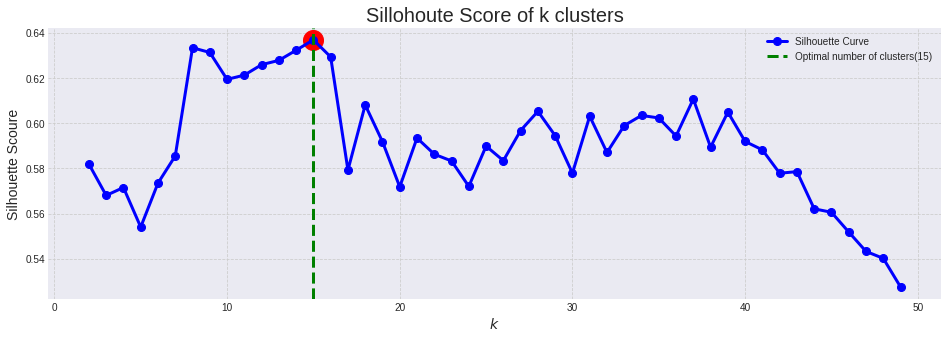

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(range(2,50), silhouette_scores, "bo-", color='blue',
          linewidth=3, markersize=8, label='Silhouette Curve')
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette Scoure", fontsize=14)
plt.grid(which='major', color='#cccccc', linestyle='--')

#Calculate Optimal number of Clusters
k = np.argmax(silhouette_scores) + 2

#Draw line to mark optimal no. of clusters
plt.axvline(x=k, linestyle='--', c='green', linewidth=3,
            label='Optimal number of clusters({})'.format(k))
plt.scatter(k, silhouette_scores[k-2], c='red', s=400)
plt.legend(shadow=True)
plt.title('Sillohoute Score of k clusters', fontsize = 20)

Text(0.5, 1.0, 'FTSE 100 Stocks Clustered by Returns and Velocity')

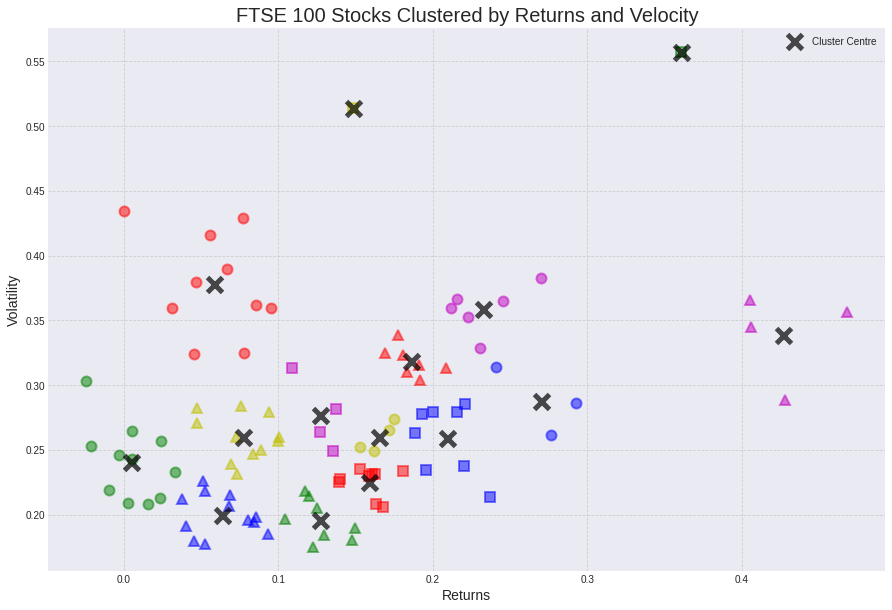

In [ ]:
# computing K-Means with K = 15 (15 clusters)
from scipy.cluster.vq import kmeans,vq
from pylab import plot,show

X = ret_vol.iloc[:,:].values
centroids,_ = kmeans(X,15)

# assign each sample to a cluster
idx,_ = vq(X,centroids)

# assign each sample to a cluster
idx,_ = vq(X,centroids)

# some plotting using numpy's logical indexing
plt.figure(figsize = (15,10))
plot(X[idx==0,0],X[idx==0,1],'or',
     X[idx==1,0],X[idx==1,1],'og',
     X[idx==2,0],X[idx==2,1],'ob',
     X[idx==3,0],X[idx==3,1],'oy',
     X[idx==4,0],X[idx==4,1],'om',
     X[idx==5,0],X[idx==5,1],'sr',
     X[idx==6,0],X[idx==6,1],'sg',
     X[idx==7,0],X[idx==7,1],'sb',
     X[idx==8,0],X[idx==8,1],'sy',
     X[idx==9,0],X[idx==9,1],'sm',
     X[idx==10,0],X[idx==10,1],'^r',
     X[idx==11,0],X[idx==11,1],'^g',
     X[idx==12,0],X[idx==12,1],'^b',
     X[idx==13,0],X[idx==13,1],'^y',
     X[idx==14,0],X[idx==14,1],'^m',
     markersize=10, alpha=0.5, markeredgewidth=2)
plot(centroids[:,0],centroids[:,1],'xr',markersize=15, markeredgecolor='black',
     markeredgewidth=5, alpha=0.7, label ='Cluster Centre')
plt.xlabel("Returns", fontsize=14)
plt.ylabel("Volatility", fontsize=14)
plt.grid(which='major', color='#cccccc', linestyle='--')
plt.legend()
plt.title('FTSE 100 Stocks Clustered by Returns and Velocity', fontsize=20)

## **Create GMM Clusters**

In [ ]:
#Get 28 clusters

from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components = 15)
gm.fit(returns.dropna())

#Predict for each company
clusters = gm.predict(returns)
clusters_df = pd.DataFrame({'Cluster':clusters,
                           'Ticker':returns.transpose().columns})

#Sort by Clusters
clusters = clusters_df.sort_values(['Cluster'])
clusters

,Cluster,Ticker
19,0,BP.L
44,0,IMB.L
34,0,GLEN.L
57,0,MRW.L
68,0,PSON.L
...,...,...
75,14,RSA.L
11,14,BARC.L
70,14,RDSA.L
96,14,VOD.L


In [ ]:
#Save as csv
clusters.to_csv("/content/drive/MyDrive/Python/Colab_Notebooks/Project_Files/Clusters/FTSE_Clusters15_vol.csv")

## **Clustering Evaluation**

# **Random Forest Classifier**

## **Load Clusters**

In [ ]:
#Load Clusters
clusters = pd.read_csv('/content/drive/MyDrive/Python/Colab_Notebooks/Project_Files/Clusters/FTSE_Clusters15_vol.csv').drop('Unnamed: 0', axis=1)
clusters

,Cluster,Ticker
0,0,VOD.L
1,0,SSE.L
2,0,RDSA.L
3,0,KGF.L
4,0,BARC.L
...,...,...
94,14,NXT.L
95,14,PRU.L
96,14,ABF.L
97,14,EVR.L


## **Train-Test Split**

In [ ]:
#Split Data
FTSE.index = pd.to_datetime(FTSE.index)

train_data = FTSE.loc[:'2016-12-31',]
test_data = FTSE.loc['2017-01-01':] 

## **Inilitialise RFC and Split Train Data**

In [ ]:
#Separate between X and Y
from sklearn.model_selection import RandomizedSearchCV, validation_curve, TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier

X_train = train_data.loc[:,Indicators]

Y_train = train_data.loc[:,['Target_Direction']]

#Create validation curve for the Random Forest Classifier
rf = RandomForestClassifier()

## **N_Estimators**

Text(0, 0.5, 'Mean Validation Score')

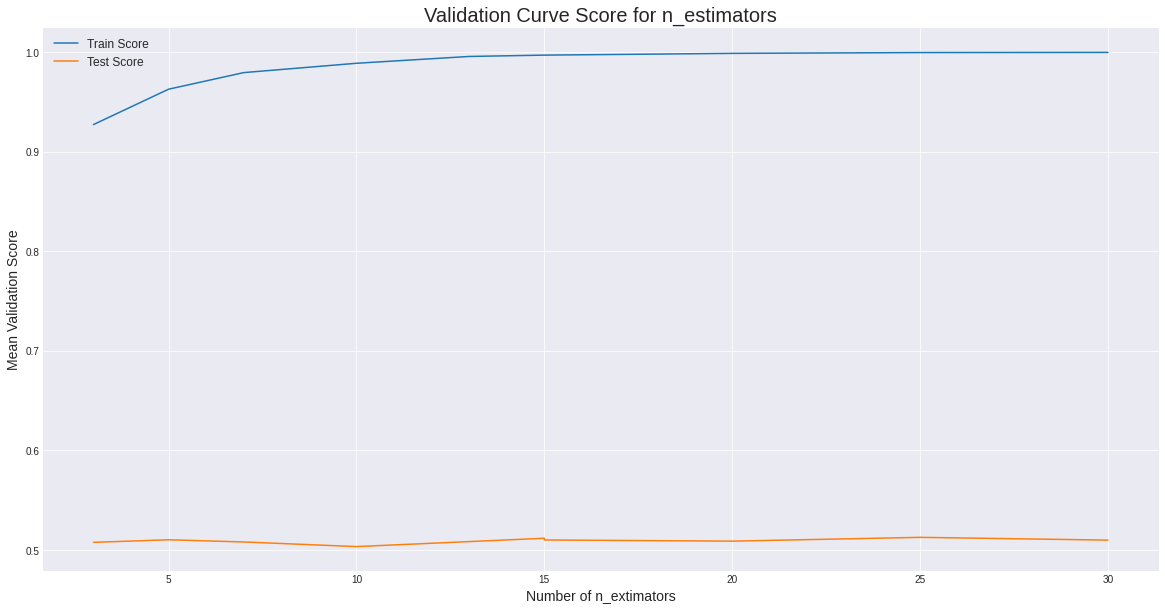

In [ ]:
#Determine starting value of n-estimators
train_scoreNum, test_scoreNum = validation_curve(rf,
                                X = X_train.loc['2010-01-01':], y = Y_train.loc['2010-01-01':, 'Target_Direction'], 
                                param_name = 'n_estimators', 
                                param_range = [3,5,7,10,13,15,20,25,30], cv = TimeSeriesSplit(n_splits = 3))

train_scores_mean = np.mean(train_scoreNum, axis=1)
train_scores_std = np.std(train_scoreNum, axis=1)
test_scores_mean = np.mean(test_scoreNum, axis=1)
test_scores_std = np.std(test_scoreNum, axis=1)

plt.figure(figsize = (20,10))
plt.plot([3,5,7,10,13,15,20,25,30],train_scores_mean)
plt.plot([3,5,7,10,15,15,20,25,30],test_scores_mean)
plt.legend(['Train Score','Test Score'], fontsize = 'large')
plt.title('Validation Curve Score for n_estimators', fontsize=20)
plt.xlabel('Number of n_extimators', fontsize=14)
plt.ylabel('Mean Validation Score', fontsize=14)

## **Max Depth**

Text(0, 0.5, 'Mean Validation Score')

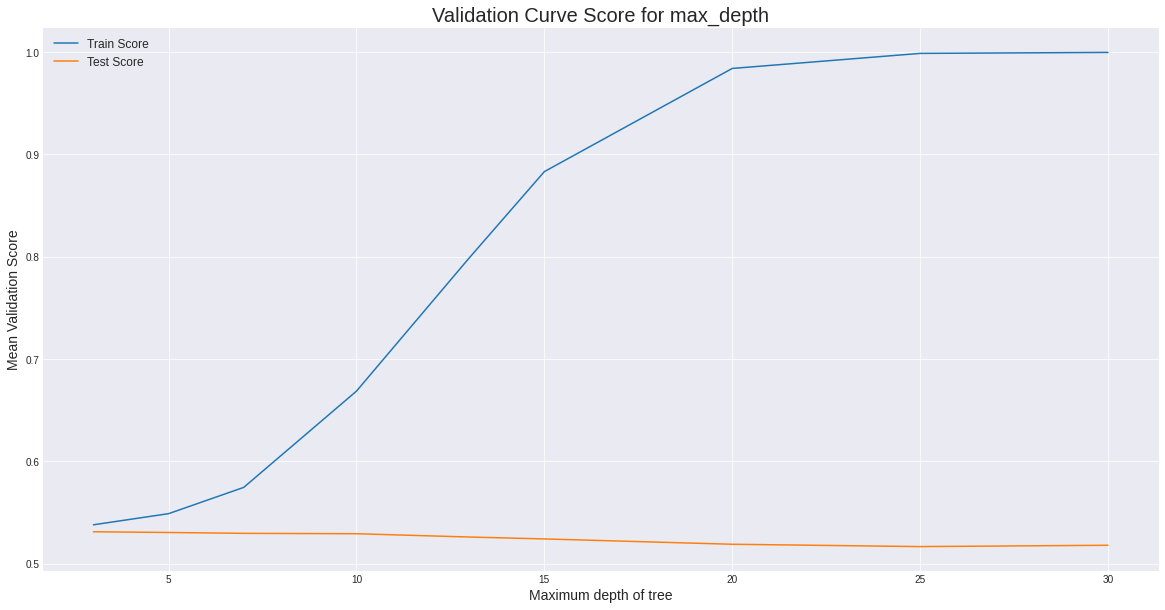

In [ ]:
#Determine starting value of max_depth 
train_scoreDep, test_scoreDep = validation_curve(rf,
                                X = X_train.loc['2010-01-01':], y = Y_train.loc['2010-01-01':, 'Target_Direction'], 
                                param_name = 'max_depth', 
                                param_range = [3,5,7,10,13,15,20,25,30], cv = TimeSeriesSplit(n_splits = 3))

train_scores_mean = np.mean(train_scoreDep, axis=1)
train_scores_std = np.std(train_scoreDep, axis=1)
test_scores_mean = np.mean(test_scoreDep, axis=1)
test_scores_std = np.std(test_scoreDep, axis=1)

plt.figure(figsize = (20,10))
plt.plot([3,5,7,10,13,15,20,25,30],train_scores_mean)
plt.plot([3,5,7,10,13,15,20,25,30],test_scores_mean)
plt.legend(['Train Score','Test Score'], fontsize = 'large')
plt.title('Validation Curve Score for max_depth', fontsize = 20)
plt.xlabel('Maximum depth of tree', fontsize=14)
plt.ylabel('Mean Validation Score', fontsize=14)

## **Min Samples Leaf**

Text(0, 0.5, 'Mean Validation Score')

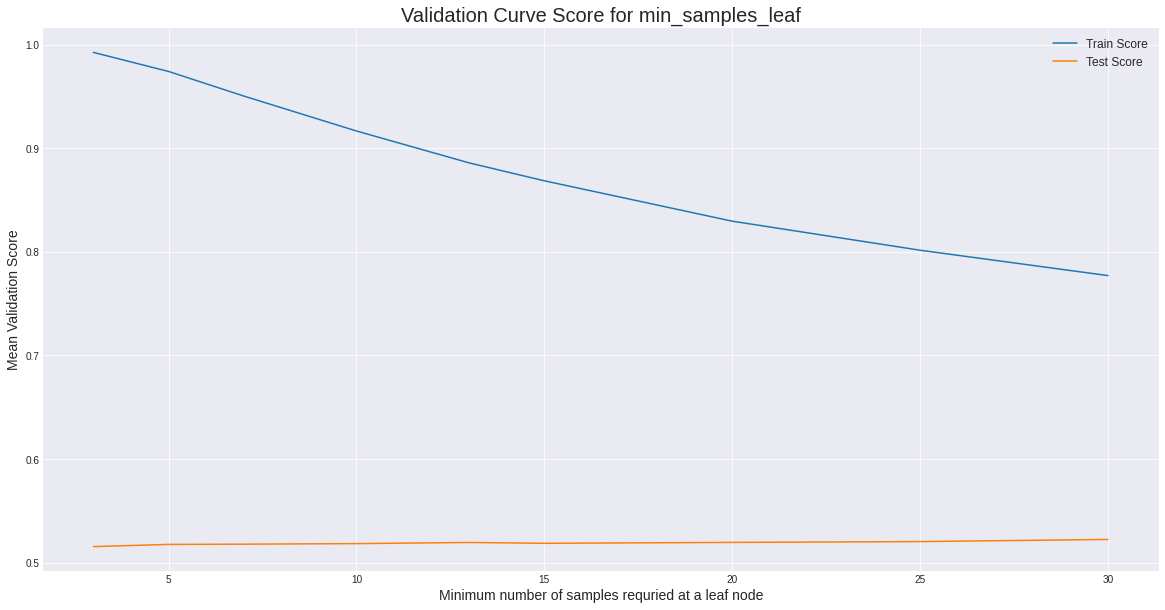

In [ ]:
#Determine starting value of max_samples_leaf
train_scoreMSL, test_scoreMSL = validation_curve(rf,
                                X = X_train.loc['2010-01-01':], y = Y_train.loc['2010-01-01':, 'Target_Direction'], 
                                param_name = 'min_samples_leaf', 
                                param_range = [3,5,7,10,13,15,20,25,30], cv = TimeSeriesSplit(n_splits = 3))

train_scores_mean = np.mean(train_scoreMSL, axis=1)
train_scores_std = np.std(train_scoreMSL, axis=1)
test_scores_mean = np.mean(test_scoreMSL, axis=1)
test_scores_std = np.std(test_scoreMSL, axis=1)

plt.figure(figsize = (20,10))
plt.plot([3,5,7,10,13,15,20,25,30],train_scores_mean)
plt.plot([3,5,7,10,13,15,20,25,30],test_scores_mean)
plt.legend(['Train Score','Test Score'], fontsize = 'large')
plt.title('Validation Curve Score for min_samples_leaf', fontsize=20)
plt.xlabel('Minimum number of samples requried at a leaf node', fontsize=14)
plt.ylabel('Mean Validation Score', fontsize=14)

## **Min Samples Leaf 2**

Text(0, 0.5, 'Mean Validation Score')

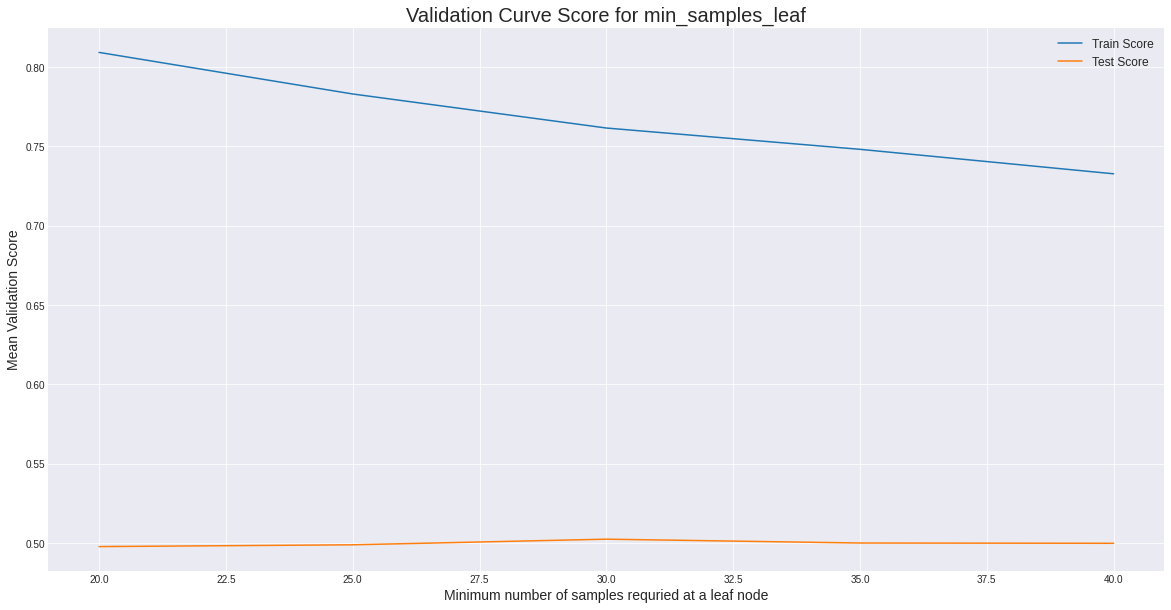

In [ ]:
#Determine starting value of max_samples_leaf
train_scoreMSL, test_scoreMSL = validation_curve(rf,
                                X = X_train.loc['2010-01-01':], y = Y_train.loc['2010-01-01':, 'Target_Direction'], 
                                param_name = 'min_samples_leaf', 
                                param_range = [20,25,30, 35, 40], cv = TimeSeriesSplit(n_splits = 3))

train_scores_mean = np.mean(train_scoreMSL, axis=1)
train_scores_std = np.std(train_scoreMSL, axis=1)
test_scores_mean = np.mean(test_scoreMSL, axis=1)
test_scores_std = np.std(test_scoreMSL, axis=1)

plt.figure(figsize = (20,10))
plt.plot([20,25,30, 35, 40],train_scores_mean)
plt.plot([20,25,30, 35, 40],test_scores_mean)
plt.legend(['Train Score','Test Score'], fontsize = 'large')
plt.title('Validation Curve Score for min_samples_leaf', fontsize=20)
plt.xlabel('Minimum number of samples requried at a leaf node', fontsize=14)
plt.ylabel('Mean Validation Score', fontsize=14)

## **Min Samples Split**

Text(0, 0.5, 'Mean Validation Score')

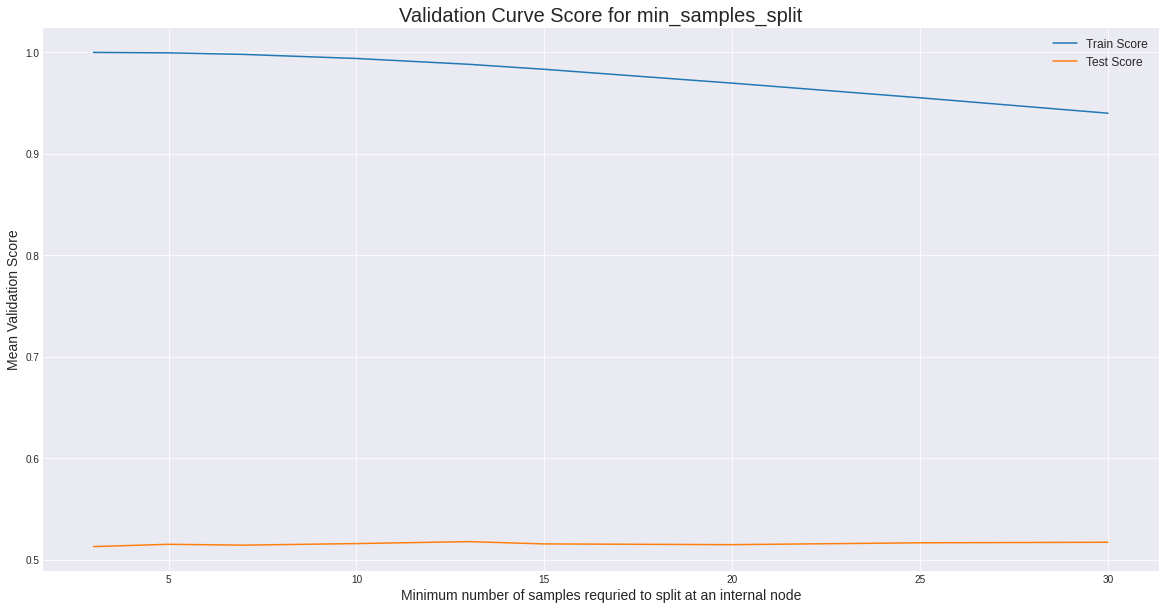

In [ ]:
#Determine starting value of max_samples_split
train_scoreMSS, test_scoreMSS = validation_curve(rf,
                                X = X_train.loc['2010-01-01':], y = Y_train.loc['2010-01-01':, 'Target_Direction'], 
                                param_name = 'min_samples_split', 
                                param_range = [3,5,7,10,13,15,20,25,30], cv = TimeSeriesSplit(n_splits = 3))

train_scores_mean = np.mean(train_scoreMSS, axis=1)
train_scores_std = np.std(train_scoreMSS, axis=1)
test_scores_mean = np.mean(test_scoreMSS, axis=1)
test_scores_std = np.std(test_scoreMSS, axis=1)

plt.figure(figsize = (20,10))
plt.plot([3,5,7,10,13,15,20,25,30],train_scores_mean)
plt.plot([3,5,7,10,13,15,20,25,30],test_scores_mean)
plt.legend(['Train Score','Test Score'], fontsize = 'large')
plt.title('Validation Curve Score for min_samples_split', fontsize = 20)
plt.xlabel('Minimum number of samples requried to split at an internal node', fontsize=14)
plt.ylabel('Mean Validation Score', fontsize=14)

## **Create RFC Models**

In [ ]:
#Loop for 15 iternations for each cluster
for cluster_selected in clusters.Cluster.unique():
    
    print(f'The current cluster running is : {cluster_selected}')
    
    #Get data for cluster
    cl_data = FTSE[FTSE.Ticker.isin(clusters.loc[clusters.Cluster==cluster_selected,'Ticker'].tolist())].copy()
    cl_train = cl_data.loc[:'2016-12-31']
    cl_train = cl_train.dropna().copy()
    
    X_train = cl_train.loc[:,Indicators]

    Y_train = cl_train.loc[:,['Target_Direction']]

    #Define paramters from Validation Curve
    params = {'max_depth': [3, 5, 7],
          'max_features': ['sqrt'],
          'min_samples_leaf': [5, 10, 15],
          'n_estimators': [5, 7, 10],
         'min_samples_split':[10, 15, 20, 25]} 

    rf = RandomForestClassifier()

    #Perform a TimeSeriesSplit on the dataset
    time_series_split = TimeSeriesSplit(n_splits = 3)

    rf_cv = GridSearchCV(rf, params, cv = time_series_split, n_jobs = 4, verbose = 20)

    #Fit the random forest with our X_train and Y_train
    rf_cv.fit(X_train, Y_train.values.ravel())
          
    #Save the fited variable into a Pickle file
    file_loc = f'{os.getcwd()}/MyDrive/Python/Colab_Notebooks/Project_Files/RFC_Models/Final/RandomForest_Cluster15_161231_v1{cluster_selected}'    
    pickle.dump(rf_cv, open(file_loc,'wb'))

The current cluster running is : 0
Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done  13 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done  15 tasks      | elapsed:    2.4s
[Parallel(

The current cluster running is : 1
Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done  16 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done  18 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done  20 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done  22 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Do

The current cluster running is : 2
Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0253s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Batch computation too fast (0.1805s.) Setting batch_size=4.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done  1

The current cluster running is : 3
Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done  16 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done  18 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done  20 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done  22 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done  30 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Do

The current cluster running is : 4
Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done  18 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done  20 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done  22 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Do

The current cluster running is : 5
Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0482s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Batch computation too fast (0.1783s.) Setting batch_size=4.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done  16 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done  1

The current cluster running is : 6
Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done  18 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done  20 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done  22 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Do

The current cluster running is : 7
Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0453s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done  18 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done  20 tasks      | elapse

The current cluster running is : 8
Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0214s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Batch computation too fast (0.1133s.) Setting batch_size=4.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  1

The current cluster running is : 9
Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0420s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done  16 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done  20 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done  22 tasks      | elapsed:    0.6s
[Pa

The current cluster running is : 10
Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done  16 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done  18 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done  20 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done  22 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Do

The current cluster running is : 11
Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0767s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done  18 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done  20 tasks      | elapse

The current cluster running is : 12
Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0227s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Batch computation too fast (0.1525s.) Setting batch_size=4.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done  1

The current cluster running is : 13
Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0721s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done  16 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done  18 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done  20 tasks      | elapse

The current cluster running is : 14
Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0462s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done  18 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done  20 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done  22 tasks      | elapsed:    1.0s
[Pa

In [ ]:
X_test

,SMA,EMA,MACD,Upper Band,Middle Band,Lower Band,RSI,ADX,Williams %R,ROC,FASTK,FASTD
Date,,,,,,,,,,,,
2017-01-03,2700.357143,2694.479507,32.009505,2775.215199,2675.200000,2575.184801,58.065223,29.814191,-36.885246,1.573623,53.608247,80.521699
2017-01-03,1492.772103,1500.019154,28.273719,1580.359045,1463.280652,1346.202259,63.159995,31.034315,-27.167626,4.680841,31.884060,72.713805
2017-01-03,234.685715,229.012382,-4.160263,271.779491,235.565001,199.350511,45.211068,20.551246,-79.597703,-5.663881,26.337420,26.643573
2017-01-03,672.535714,672.096064,6.799888,692.127372,665.775000,639.422628,62.798567,24.711699,-8.823529,1.111935,80.645161,86.220152
2017-01-03,3225.075841,3223.622008,-7.931929,3394.764518,3225.650000,3063.095864,39.996140,27.126618,-90.119795,-3.480372,9.164741,49.632750
2017-01-03,1361.541268,1367.656737,23.770853,1405.748182,1362.959381,1320.170580,66.502776,38.321896,-7.581087,3.278686,86.915895,86.220152
2017-01-03,1415.142857,1419.317113,20.017791,1474.954146,1394.150000,1313.345854,67.457635,27.013348,-12.871287,4.100719,62.857143,83.915344
2017-01-03,648.892857,651.589003,-3.345501,667.768523,642.875000,617.981477,46.047641,25.985803,-28.282828,0.540541,12.500000,61.111111
2017-01-03,3135.123012,3154.280645,32.009505,3307.694133,3085.797107,2863.900081,65.826009,29.145520,-9.026146,3.617425,66.371595,72.952187


# **Back-test**

## **All Data**

In [ ]:
test_date = test_data.copy()
test_date['Date'] = test_data.index
test_date = test_date.sort_index()
test_date

,Open,High,Low,Close,Adj Close,Volume,Ticker,SMA,EMA,MACD,Upper Band,Middle Band,Lower Band,RSI,ADX,Williams %R,ROC,FASTK,FASTD,Close_Shifted,Target,Target_Direction,Date
Date,,,,,,,,,,,,,,,,,,,,,,,
2017-01-03,1166.000000,1185.000000,1159.000000,1162.000000,965.232056,4458007.0,AAL.L,1155.178571,1160.028673,-3.801123,1258.919658,1176.500000,1094.080342,50.088844,15.562089,-61.442006,0.649632,62.903226,63.216419,1285.000000,12.296487,1,2017-01-03
2017-01-03,1500.000000,1517.000000,1496.750000,1500.000000,1402.270020,1470432.0,BRBY.L,1474.357143,1475.609312,14.363745,1510.393735,1468.100000,1425.806265,61.359162,15.080276,-22.972973,3.163686,74.626866,83.871100,1561.000000,4.720745,1,2017-01-03
2017-01-03,1023.000000,1036.000000,1015.000000,1036.000000,-2612.698242,1171503.0,STJ.L,999.607143,998.893714,16.350572,1036.644349,989.475000,942.305651,67.457635,27.975987,-6.918239,3.600000,92.537224,86.220152,1073.000000,2.417795,1,2017-01-03
2017-01-03,371.500000,376.450012,369.049988,371.450012,304.244263,14324026.0,BT-A.L,366.414287,366.849122,2.346734,378.425400,362.950000,347.474600,56.580820,15.389451,-15.290514,2.173023,64.912281,66.980894,396.850006,5.234899,1,2017-01-03
2017-01-03,1771.000000,1787.000000,1755.000000,1773.000000,1542.992920,487024.0,CCH.L,1690.357143,1707.176671,17.019882,1765.226227,1675.850000,1586.473773,67.457635,26.642646,-7.567568,6.358728,82.926829,86.220152,1779.000000,0.956669,1,2017-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-18,2694.000000,2705.000000,2606.000000,2664.000000,2246.371582,2386951.0,PSN.L,2586.142857,2614.264043,32.009505,2779.032931,2575.750000,2372.467069,59.581997,29.546350,-57.545272,5.171733,37.417943,55.463929,2688.000000,0.597238,1,2019-12-18
2019-12-18,1707.000000,1723.000000,1697.000000,1697.000000,1653.391235,644275.0,SMIN.L,1629.678571,1645.333309,9.283066,1715.014492,1640.075000,1565.135508,63.561562,20.108887,-18.232822,6.162027,79.687500,86.220152,1686.500000,-1.055718,0,2019-12-18
2019-12-18,943.599976,953.799988,938.000000,938.000000,925.384033,1685785.0,ANTO.L,900.957136,913.649619,13.145287,952.868157,898.109998,843.351838,61.589384,14.005696,-18.425457,6.546081,62.962978,68.178331,928.400024,-1.270729,0,2019-12-18


In [ ]:
date = ()

In [ ]:
all_data_preds = pd.DataFrame({'Date':[],
                                  'Ticker':[],
                                  'Prediction':[]})

for date in test_date.Date.unique():
    test_date_data = test_date.loc[date]    
    for cluster_selected in clusters.Cluster.unique():
        rf_cv =  pickle.load(open(os.getcwd() + f'/MyDrive/Python/Colab_Notebooks/Project_Files/RFC_Models/RandomForest_Cluster15_161231{cluster_selected}', 'rb'))
        best_rfc = rf_cv.best_estimator_
        cluster_data = test_date_data.loc[test_date_data.Ticker.isin(clusters.loc[clusters.Cluster==cluster_selected,'Ticker'].tolist())].copy()
        cluster_data = cluster_data.dropna()
        if (cluster_data.shape[0]>0):
            X_test = cluster_data.loc[:,Indicators]

            all_data_preds = all_data_preds.append(pd.DataFrame({'Date':cluster_data.index,
                                                                  'Ticker':cluster_data['Ticker'],
                                                                  'Prediction':best_rfc.predict_proba(X_test)[:,1]}), ignore_index = True)

In [ ]:
all_data_preds

,Date,Ticker,Prediction
0,2017-01-03,SSE.L,0.468056
1,2017-01-03,VOD.L,0.605222
2,2017-01-03,BARC.L,0.429353
3,2017-01-03,RSA.L,0.511647
4,2017-01-03,RDSA.L,0.392705
...,...,...,...
73955,2019-12-18,REL.L,0.519789
73956,2019-12-18,EVR.L,0.536627
73957,2019-12-18,ABF.L,0.548505
73958,2019-12-18,INF.L,0.558649


In [ ]:
adp = all_data_preds.copy()

In [ ]:
adp.set_index('Date')

,Ticker,Prediction
Date,,
2017-01-03,SSE.L,0.468056
2017-01-03,VOD.L,0.605222
2017-01-03,BARC.L,0.429353
2017-01-03,RSA.L,0.511647
2017-01-03,RDSA.L,0.392705
...,...,...
2019-12-18,REL.L,0.519789
2019-12-18,EVR.L,0.536627
2019-12-18,ABF.L,0.548505


In [ ]:
adp = adp.sort_values(['Ticker', 'Date'])
adp.set_index('Date')
adp.to_csv('/content/drive/MyDrive/Python/Colab_Notebooks/Project_Files/Final/Predictions/FTSE_Stock_Predictions_15_ALL_uf.csv')

In [ ]:
atp = pd.DataFrame(test_data[['Ticker','Target_Direction']]).copy()
atp = atp.sort_values(['Ticker', 'Date'])
atp.to_csv('/content/drive/MyDrive/Python/Colab_Notebooks/Project_Files/Final/Predictions/All_targets.csv')

In [ ]:
all_preds = pd.read_csv('/content/drive/MyDrive/Python/Colab_Notebooks/Project_Files/Final/Predictions/FTSE_Stock_Predictions_15_ALL.csv').drop('Unnamed: 0', axis=1)
all_preds

,Date,Ticker,Prediction,Target_Direction
0,03/01/2017,AAL.L,0.496301,1
1,04/01/2017,AAL.L,0.527560,1
2,05/01/2017,AAL.L,0.496737,1
3,06/01/2017,AAL.L,0.531217,1
4,09/01/2017,AAL.L,0.496780,1
...,...,...,...,...
73955,12/12/2019,WTB.L,0.561138,0
73956,13/12/2019,WTB.L,0.529136,0
73957,16/12/2019,WTB.L,0.529136,0
73958,17/12/2019,WTB.L,0.535411,0


In [ ]:
all_preds['Predicted_Direction'] = np.where(all_preds['Prediction']>0.5,1.0,0.0)
actual_val_all = all_preds['Target_Direction']
y_preds_all = all_preds['Predicted_Direction']
all_preds
all_preds.to_csv('/content/drive/MyDrive/Python/Colab_Notebooks/Project_Files/Final/Predictions/FTSE_Stock_Predictions_15_ALL_fin.csv')

In [ ]:
all_preds

,Date,Ticker,Prediction,Target_Direction,Predicted_Direction
0,03/01/2017,AAL.L,0.496301,1,0.0
1,04/01/2017,AAL.L,0.527560,1,1.0
2,05/01/2017,AAL.L,0.496737,1,0.0
3,06/01/2017,AAL.L,0.531217,1,1.0
4,09/01/2017,AAL.L,0.496780,1,0.0
...,...,...,...,...,...
73955,12/12/2019,WTB.L,0.561138,0,1.0
73956,13/12/2019,WTB.L,0.529136,0,1.0
73957,16/12/2019,WTB.L,0.529136,0,1.0
73958,17/12/2019,WTB.L,0.535411,0,1.0


### **Evaluation Metrics**

In [ ]:
#Select Data sample to predict for
metrics_data = test_data

rfc_acc= pd.DataFrame({'Cluster':[],
                          'Accuracy':[]})

#Calculate Accuracy of each RFC Model 
for cluster_selected in clusters.Cluster.unique():
    rf_cv =  pickle.load(open(os.getcwd() + f'/MyDrive/Python/Colab_Notebooks/Project_Files/RFC_Models/RandomForest_Cluster15_161231{cluster_selected}', 'rb'))
    cluster_data = metrics_data.loc[metrics_data.Ticker.isin(clusters.loc[clusters.Cluster==cluster_selected,'Ticker'].tolist())].copy()
    cluster_data = cluster_data.dropna()
    if (cluster_data.shape[0]>0):
        X_test = cluster_data.loc[:,Indicators]
        y_test = cluster_data['Target_Direction']
        rfc_score = rf_cv.score(X_test, y_test)

        rfc_acc = rfc_acc.append(pd.DataFrame({'Cluster':[cluster_selected],
                                                       'Accuracy':rfc_score}))
rfc_acc

In [ ]:
from sklearn.metrics import classification_report
target_labels = ['Upwards', 'Downwards']
labels = [1.0, 0.0]
clrp = classification_report(actual_val_all, y_preds_all, labels, target_labels, output_dict=True)
print(clrp)    

{'Upwards': {'precision': 0.5301191647534711, 'recall': 0.7458661265926628, 'f1-score': 0.6197531127182099, 'support': 39007}, 'Downwards': {'precision': 0.4803962679526156, 'recall': 0.26220925242468457, 'f1-score': 0.33924968999278193, 'support': 34953}, 'accuracy': 0.5172931314223905, 'macro avg': {'precision': 0.5052577163530434, 'recall': 0.5040376895086737, 'f1-score': 0.4795014013554959, 'support': 73960}, 'weighted avg': {'precision': 0.5066204571834292, 'recall': 0.5172931314223905, 'f1-score': 0.4871890762860589, 'support': 73960}}


In [ ]:
class_report = pd.DataFrame(clrp).transpose()
class_report.to_csv('/content/drive/MyDrive/Python/Colab_Notebooks/Project_Files/Final/CLRP/CLRP_ALL.csv')

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf_matrix = confusion_matrix(actual_val_all, y_preds_all)
display_labels =['Downwards', 'Upwards']
disp = ConfusionMatrixDisplay(cf_matrix, display_labels)

fig, ax = plt.subplots(figsize=(3,3))
disp.plot(ax=ax, cmap='binary')

## **Individual Dates**

In [ ]:
#Set randomly selected date for forecasting
date = '2018-11-19'
date_data = test_data.loc[date]

all_preds = pd.DataFrame({'Date':[],
                                  'Ticker':[],
                                  'Prediction':[]})

#Predict each stock using the selected date's data
for cluster_selected in clusters.Cluster.unique():
    rf_cv =  pickle.load(open(os.getcwd() + f'/MyDrive/Python/Colab_Notebooks/Project_Files/RFC_Models//RandomForest_Cluster15_161231{cluster_selected}', 'rb'))
    best_rfc = rf_cv.best_estimator_
    cluster_data = date_data.loc[date_data.Ticker.isin(clusters.loc[clusters.Cluster==cluster_selected,'Ticker'].tolist())].copy()
    cluster_data = cluster_data.dropna()
    if (cluster_data.shape[0]>0):
        X_test = cluster_data.loc[:,Indicators]

        all_preds = all_preds.append(pd.DataFrame({'Date':cluster_data.index,
                                                    'Ticker':cluster_data['Ticker'],
                                                    'Prediction':best_rfc.predict_proba(X_test)[:,1]}), ignore_index = True)

In [ ]:
all_preds = all_preds.sort_values(by = ['Prediction'], ascending = False)

for selected_company in all_preds['Ticker']:
    actual = FTSE[FTSE.Ticker == selected_company].loc[date,'Target_Direction']
    pct_change = FTSE[FTSE.Ticker == selected_company].loc[date,'Target']
    all_preds.loc[all_preds.Ticker == selected_company,'actual'] = actual
    all_preds.loc[all_preds.Ticker == selected_company,'pct_change'] = pct_change


In [ ]:
all_preds['Predicted_Direction'] = np.where(all_preds['Prediction']>0.5,1.0,0.0)
actual_val = all_preds['actual']
y_preds = all_preds['Predicted_Direction']
all_preds
all_preds.to_csv('/content/drive/MyDrive/Python/Colab_Notebooks/Project_Files/Final/Predictions/FTSE_Stock_Predictions_15_181119.csv')

In [ ]:
#all_preds = pd.read_csv('/content/drive/MyDrive/Python/Colab_Notebooks/Project_Files/Predictions/FTSE_Stock_Predictions_15_170103_v4.csv').drop('Unnamed: 0', axis=1)
all_preds

,Date,Ticker,Prediction,actual,pct_change,Predicted_Direction
8,2018-11-19,BKG.L,0.734533,1.0,0.537153,1.0
54,2018-11-19,BDEV.L,0.694402,0.0,-1.836735,1.0
32,2018-11-19,LSEG.L,0.688814,1.0,0.471464,1.0
55,2018-11-19,HL.L,0.687678,1.0,7.065669,1.0
19,2018-11-19,SDR.L,0.667155,1.0,4.331984,1.0
...,...,...,...,...,...,...
11,2018-11-19,SPX.L,0.452393,0.0,-4.256966,0.0
31,2018-11-19,ULVR.L,0.450364,1.0,0.164667,0.0
49,2018-11-19,PSON.L,0.419071,1.0,2.276598,0.0
79,2018-11-19,OCDO.L,0.267605,1.0,12.166894,0.0


In [ ]:
all_predictions.sort_values(by=['Prediction']).head(10)

,Date,Ticker,Prediction,actual,pct_change
11,2017-01-03,SPX.L,0.358397,1.0,3.422867
77,2017-01-03,OCDO.L,0.368602,1.0,2.557257
2,2017-01-03,RDSA.L,0.392705,1.0,0.683723
31,2017-01-03,LSEG.L,0.404327,1.0,0.686342
8,2017-01-03,BKG.L,0.422818,1.0,2.017699
55,2017-01-03,PSN.L,0.425790,1.0,12.314709
64,2017-01-03,RR.L,0.427075,1.0,0.519677
0,2017-01-03,BARC.L,0.429353,0.0,-0.514027
22,2017-01-03,BME.L,0.451176,1.0,5.062849
44,2017-01-03,HSBA.L,0.463248,1.0,0.718131


### **Evaluation Metrics**

In [ ]:
#Select Data sample to predict for
metrics_data = test_data.loc[date]

rfc_acc= pd.DataFrame({'Cluster':[],
                          'Accuracy':[]})

#Calculate Accuracy of each RFC Model 
for cluster_selected in clusters.Cluster.unique():
    rf_cv =  pickle.load(open(os.getcwd() + f'/MyDrive/Python/Colab_Notebooks/Project_Files/RFC_Models/RandomForest_Cluster15_161231{cluster_selected}', 'rb'))
    cluster_data = metrics_data.loc[metrics_data.Ticker.isin(clusters.loc[clusters.Cluster==cluster_selected,'Ticker'].tolist())].copy()
    cluster_data = cluster_data.dropna()
    if (cluster_data.shape[0]>0):
        X_test = cluster_data.loc[:,Indicators]
        y_test = cluster_data['Target_Direction']
        rfc_score = rf_cv.score(X_test, y_test)

        rfc_acc = rfc_acc.append(pd.DataFrame({'Cluster':[cluster_selected],
                                                       'Accuracy':rfc_score}))
rfc_acc

,Cluster,Accuracy
0,0.0,1.000000
0,1.0,0.428571
0,2.0,0.666667
0,3.0,0.666667
0,4.0,0.700000
0,5.0,1.000000
0,6.0,0.888889
0,7.0,0.333333
0,8.0,0.000000
0,9.0,0.250000


In [ ]:
from sklearn.metrics import classification_report
target_labels = ['Upwards', 'Downwards']
labels = [1.0, 0.0]
clrp = classification_report(actual_val, y_preds, labels, target_labels, output_dict=True)
print(clrp)    

{'Upwards': {'precision': 0.7088607594936709, 'recall': 0.8, 'f1-score': 0.7516778523489933, 'support': 70}, 'Downwards': {'precision': 0.3, 'recall': 0.20689655172413793, 'f1-score': 0.24489795918367346, 'support': 29}, 'accuracy': 0.6262626262626263, 'macro avg': {'precision': 0.5044303797468355, 'recall': 0.503448275862069, 'f1-score': 0.4982879057663334, 'support': 99}, 'weighted avg': {'precision': 0.5890934663086561, 'recall': 0.6262626262626263, 'f1-score': 0.6032271765732935, 'support': 99}}


In [ ]:
class_report = pd.DataFrame(clrp).transpose()
class_report.to_csv('/content/drive/MyDrive/Python/Colab_Notebooks/Project_Files/Final/CLRP/CLRP_181119.csv')

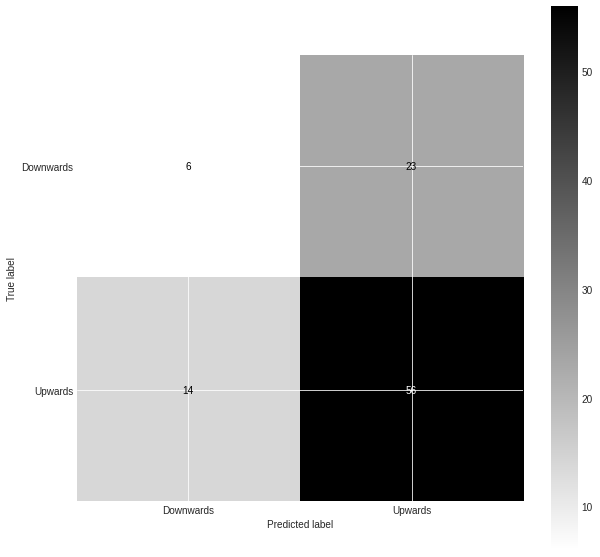

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf_matrix = confusion_matrix(all_preds['actual'], all_preds['Predicted_Direction'])
display_labels =['Downwards', 'Upwards']
disp = ConfusionMatrixDisplay(cf_matrix, display_labels)

fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap='binary')

# **Debugging**

In [ ]:
rf_cv = GridSearchCV(rf, params, cv = time_series_split, n_jobs = -1, verbose = 20)
rf_cv

In [ ]:
dow = pdr.get_data_yahoo('DOW', start, end)

In [ ]:
dow.to_csv('DOW_data.csv')
from google.colab import files
files.download("DOW_data.csv") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
current_cluster_data = FTSE[FTSE.Ticker.isin(clusters_df.loc[clusters_df.Cluster== 0,'Companies'].tolist())].copy()
current_cluster_data

In [ ]:
#See RB data in FTSE
FTSE.loc[FTSE['Ticker'].isin(['MNG.L'])]

,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,,,,,,,
2019-10-21,220.000000,228.199997,213.000000,218.000000,193.456070,64719613.0,MNG.L
2019-10-22,219.050003,220.600006,201.199997,202.649994,179.834259,49121190.0,MNG.L
2019-10-23,213.000000,215.699997,209.699997,214.000000,189.906403,135288737.0,MNG.L
2019-10-24,212.399994,227.000000,212.399994,227.000000,201.442795,48951885.0,MNG.L
2019-10-25,226.000000,228.800003,223.679993,225.199997,199.845428,22016549.0,MNG.L
...,...,...,...,...,...,...,...
2021-01-25,196.350006,197.199997,189.550003,190.750000,179.853821,5728613.0,MNG.L
2021-01-26,188.750000,191.449997,183.350006,183.399994,172.923660,10524556.0,MNG.L
2021-01-27,182.000000,183.459000,175.949997,178.100006,167.926437,9248662.0,MNG.L


In [ ]:
#Download all FSTE Data
FTSE.to_csv('FTSE_all_stock_data.csv')
from google.colab import files
files.download("FTSE_all_stock_data.csv") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>